https://plot.ly/ipython-notebooks/principal-component-analysis/

Although this probably a better tutorial
https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

Both Linear Discriminant Analysis (LDA) and PCA are linear transformation methods. PCA yields the directions (principal components) that maximize the variance of the data, whereas LDA also aims to find the directions that maximize the separation (or discrimination) between different classes, which can be useful in pattern classification problem (PCA "ignores" class labels).
In other words, PCA projects the entire dataset onto a different feature (sub)space, and LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.

The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.

Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

PCA projects the entire dataset onto a different feature (sub)space, and LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.

** A Summary of the PCA Approach

1) Standardize the data.
2) Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
3) Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the kk largest eigenvalues where kk is the number of dimensions of the new feature subspace (k≤dk≤d)/.
4) Construct the projection matrix WW from the selected kk eigenvectors.
5) Transform the original dataset XX via WW to obtain a kk-dimensional feature subspace YY.

In [1]:
# Load up dataset
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [69]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df['class'].values

print (df['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# PCA compared to LDA

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514]


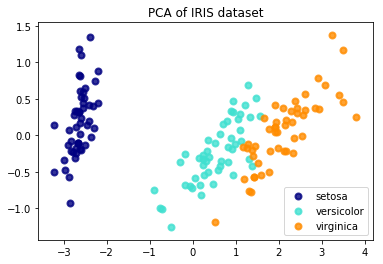

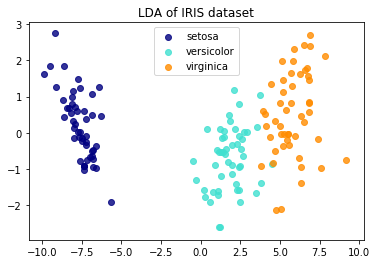

In [87]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

[ 92.46  97.76  99.48]


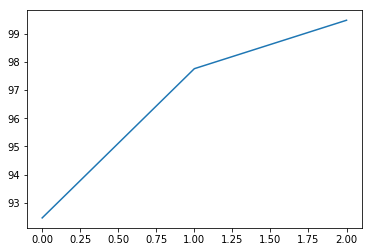

In [88]:
%matplotlib inline

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
print (var1)

# PCA in scikit-learn

In [71]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [76]:
traces = []

for name in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)
    
data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [78]:
print(Y_sklearn)
print(X_std)

[[ -2.26454173e+00   5.05703903e-01  -1.21943348e-01]
 [ -2.08642550e+00  -6.55404729e-01  -2.27250832e-01]
 [ -2.36795045e+00  -3.18477311e-01   5.14796236e-02]
 [ -2.30419716e+00  -5.75367713e-01   9.88604444e-02]
 [ -2.38877749e+00   6.74767397e-01   2.14278490e-02]
 [ -2.07053681e+00   1.51854856e+00   3.06842583e-02]
 [ -2.44571134e+00   7.45626750e-02   3.42197636e-01]
 [ -2.23384186e+00   2.47613932e-01  -8.25744645e-02]
 [ -2.34195768e+00  -1.09514636e+00   1.53562399e-01]
 [ -2.18867576e+00  -4.48629048e-01  -2.46559522e-01]
 [ -2.16348656e+00   1.07059558e+00  -2.64009373e-01]
 [ -2.32737775e+00   1.58587455e-01   1.00165616e-01]
 [ -2.22408272e+00  -7.09118158e-01  -2.23214514e-01]
 [ -2.63971626e+00  -9.38281982e-01   1.89570030e-01]
 [ -2.19229151e+00   1.88997851e+00  -4.69480095e-01]
 [ -2.25146521e+00   2.72237108e+00   3.26037967e-02]
 [ -2.20275048e+00   1.51375028e+00  -1.36349158e-03]
 [ -2.19017916e+00   5.14304308e-01  -3.86155949e-02]
 [ -1.89407429e+00   1.43111

In [44]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
import plotly
plotly.tools.set_credentials_file(username='Ariadne66', api_key='1FfcG37A2ZG80J3V0dMd')

In [45]:
# plotting histograms

traces = []

legend = {0:False, 1:False, 2:False, 3:True}

colors = {'Iris-setosa': 'rgb(31, 119, 180)', 
          'Iris-versicolor': 'rgb(255, 127, 14)', 
          'Iris-virginica': 'rgb(44, 160, 44)'}

for col in range(4):
    for key in colors:
        traces.append(Histogram(x=X[y==key, col], 
                        opacity=0.75,
                        xaxis='x%s' %(col+1),
                        marker=Marker(color=colors[key]),
                        name=key,
                        showlegend=legend[col]))

data = Data(traces)

layout = Layout(barmode='overlay',
                xaxis=XAxis(domain=[0, 0.25], title='sepal length (cm)'),
                xaxis2=XAxis(domain=[0.3, 0.5], title='sepal width (cm)'),
                xaxis3=XAxis(domain=[0.55, 0.75], title='petal length (cm)'),
                xaxis4=XAxis(domain=[0.8, 1], title='petal width (cm)'),
                yaxis=YAxis(title='count'),
                title='Distribution of the different Iris flower features')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [46]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [48]:
# The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, 
# which is a d×d matrix where each element represents the covariance between two feature

import numpy as np
# Complicated way of getting co-variance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [49]:
# Numpy to get co-variance matrix
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [50]:
#  Next, we perform an eigendecomposition on the covariance matrix:

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [51]:
# In the field of "Finance," the correlation matrix typically used instead of the covariance matrix.
# However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results 
# as a eigendecomposition on the correlation matrix, 
# since the correlation matrix can be understood as the normalized covariance matrix. 
# Eigendecomposition of the standardized data based on the correlation matrix:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


## Singular Vector Decomposition
While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. 

In [52]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

# Selecting Principal Components

In [53]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top kk eigenvectors.

In [54]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


In [ ]:
# After sorting the eigenpairs, 
#the next question is "how many principal components are we going to choose for our new feature subspace?" 
#A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. 
#The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [56]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.
Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our d×kd×k-dimensional eigenvector matrix WW.

In [57]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


# 3 - Projection Onto the New Feature Space

In this last step we will use the 4×24×2-dimensional projection matrix WW to transform our samples onto the new subspace via the equation
Y=X×WY=X×W, where YY is a 150×2150×2 matrix of our transformed samples.

In [59]:
Y = X_std.dot(matrix_w)

In [60]:
traces = []

for name in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):

    trace = Scatter(
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=data, layout=layout)
py.iplot(fig)